In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 500)

In [34]:
world_dev = pd.read_csv('datasets/World_dev.csv')
world_hap = pd.read_csv('datasets/World_Happiness_2015.csv')

In [35]:
world_dev

,CountryCode,ShortName,TableName,LongName,Alpha2Code,CurrencyUnit,SpecialNotes,Region,IncomeGroup,Wb2Code,NationalAccountsBaseYear,NationalAccountsReferenceYear,SnaPriceValuation,LendingCategory,OtherGroups,SystemOfNationalAccounts,AlternativeConversionFactor,PppSurveyYear,BalanceOfPaymentsManualInUse,ExternalDebtReportingStatus,SystemOfTrade,GovernmentAccountingConcept,ImfDataDisseminationStandard,LatestPopulationCensus,LatestHouseholdSurvey,SourceOfMostRecentIncomeAndExpenditureData,VitalRegistrationComplete,LatestAgriculturalCensus,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData
0,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,2002/03,NaN,Value added at basic prices (VAB),IDA,HIPC,Country uses the 1993 System of National Accou...,NaN,NaN,NaN,Actual,General trade system,Consolidated central government,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2013.0,2000.0
1,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,Original chained constant price data are resca...,1996,Value added at basic prices (VAB),IBRD,NaN,Country uses the 1993 System of National Accou...,NaN,Rolling,"IMF Balance of Payments Manual, 6th edition.",Actual,General trade system,Budgetary central government,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2011.0,2013.0,2006.0
2,DZA,Algeria,Algeria,People's Democratic Republic of Algeria,DZ,Algerian dinar,NaN,Middle East & North Africa,Upper middle income,DZ,1980,NaN,Value added at basic prices (VAB),IBRD,NaN,Country uses the 1968 System of National Accou...,NaN,2011,"IMF Balance of Payments Manual, 6th edition.",Actual,Special trade system,Budgetary central government,General Data Dissemination System (GDDS),2008,"Multiple Indicator Cluster Survey (MICS), 2012","Integrated household survey (IHS), 1995",NaN,NaN,2010.0,2013.0,2001.0
3,ASM,American Samoa,American Samoa,American Samoa,AS,U.S. dollar,NaN,East Asia & Pacific,Upper middle income,AS,NaN,NaN,NaN,NaN,NaN,Country uses the 1968 System of National Accou...,NaN,2011 (household consumption only).,NaN,NaN,Special trade system,NaN,NaN,2010,NaN,NaN,Yes,2007,NaN,NaN,NaN
4,ADO,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,2000,NaN,Value added at basic prices (VAB),NaN,NaN,Country uses the 1968 System of National Accou...,NaN,NaN,NaN,NaN,Special trade system,NaN,NaN,2011. Population data compiled from administra...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,WBG,West Bank and Gaza,West Bank and Gaza,West Bank and Gaza,PS,Israeli new shekel,The new base year is 2004.,Middle East & North Africa,Lower middle income,GZ,2004,NaN,Value added at basic prices (VAB),NaN,NaN,Country uses the 1968 System of National Accou...,NaN,2011,"IMF Balance of Payments Manual, 6th edition.",NaN,Special trade system,Budgetary central government,Special Data Dissemination Standard (SDDS),2007,"Multiple Indicator Cluster Survey (MICS), 2014","Integrated household survey (IHS), 2011",NaN,NaN,2010.0,NaN,2005.0
243,WLD,World,World,World,1W,NaN,World aggregate.,NaN,NaN,1W,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
244,YEM,Yemen,"Yemen, Rep.",Republic of Yemen,YE,Yemeni rial,Based on official government statistics and In...,Middle East & North Africa,Lower middle income,RY,2007,NaN,Value added at producer prices (VAP),IDA,NaN,Country uses the 1993 System of National Accou...,199096,2011,"IMF Balance of Payments Manual, 6th edition.",Estimate,Special trade system,Budgetary central government,General Data Diss

In [4]:
for col in world_dev.columns:
    print(col)

CountryCode
ShortName
TableName
LongName
Alpha2Code
CurrencyUnit
SpecialNotes
Region
IncomeGroup
Wb2Code
NationalAccountsBaseYear
NationalAccountsReferenceYear
SnaPriceValuation
LendingCategory
OtherGroups
SystemOfNationalAccounts
AlternativeConversionFactor
PppSurveyYear
BalanceOfPaymentsManualInUse
ExternalDebtReportingStatus
SystemOfTrade
GovernmentAccountingConcept
ImfDataDisseminationStandard
LatestPopulationCensus
LatestHouseholdSurvey
SourceOfMostRecentIncomeAndExpenditureData
VitalRegistrationComplete
LatestAgriculturalCensus
LatestIndustrialData
LatestTradeData
LatestWaterWithdrawalData


In [5]:
world_hap

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [6]:
merged = pd.merge(right = world_dev, left=world_hap, how='left', left_on= 'Country', right_on='ShortName')
merged

,Country,Region_x,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,CountryCode,ShortName,TableName,LongName,Alpha2Code,CurrencyUnit,SpecialNotes,Region_y,IncomeGroup,Wb2Code,NationalAccountsBaseYear,NationalAccountsReferenceYear,SnaPriceValuation,LendingCategory,OtherGroups,SystemOfNationalAccounts,AlternativeConversionFactor,PppSurveyYear,BalanceOfPaymentsManualInUse,ExternalDebtReportingStatus,SystemOfTrade,GovernmentAccountingConcept,ImfDataDisseminationStandard,LatestPopulationCensus,LatestHouseholdSurvey,SourceOfMostRecentIncomeAndExpenditureData,VitalRegistrationComplete,LatestAgriculturalCensus,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,CHE,Switzerland,Switzerland,Switzerland,CH,Swiss franc,NaN,Europe & Central Asia,High income: OECD,CH,Original chained constant price data are resca...,2010,Value added at basic prices (VAB),NaN,NaN,Country uses the 2008 System of National Accou...,NaN,Rolling,"IMF Balance of Payments Manual, 6th edition.",NaN,Special trade system,Consolidated central government,Special Data Dissemination Standard (SDDS),2010,NaN,"Expenditure survey/budget survey (ES/BS), 2004",Yes,2008,2010.0,2013.0,2000.0
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,ISL,Iceland,Iceland,Republic of Iceland,IS,Iceland krona,NaN,Europe & Central Asia,High income: OECD,IS,Original chained constant price data are resca...,2010,Value added at basic prices (VAB),NaN,NaN,Country uses the 2008 System of National Accou...,NaN,Rolling,"IMF Balance of Payments Manual, 6th edition.",NaN,General trade system,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Integrated household survey (IHS), 2010",Yes,2010,2005.0,2013.0,2005.0
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,DNK,Denmark,Denmark,Kingdom of Denmark,DK,Danish krone,NaN,Europe & Central Asia,High income: OECD,DK,Original chained constant price data are resca...,2010,Value added at basic prices (VAB),NaN,NaN,Country uses the 2008 System of National Accou...,NaN,Rolling,"IMF Balance of Payments Manual, 6th edition.",NaN,Special trade system,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Income tax registers (ITR), 2010",Yes,2010,2010.0,2013.0,2009.0
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,NOR,Norway,Norway,Kingdom of Norway,NO,Norwegian krone,NaN,Europe & Central Asia,High income: OECD,NO,Original chained constant price data are resca...,2010,Value added at basic prices (VAB),NaN,NaN,Country uses the 2008 System of National Accou...,NaN,Rolling,"IMF Balance of Payments Manual, 6th edition.",NaN,General trade system,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Income survey (IS), 2010",Yes,2010,2010.0,2013.0,2006.0
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,CAN,Canada,Canada,Canada,CA,Canadian dollar,Fiscal year end: March 31; reporting period fo...,North America,High income: OECD,CA,Original chained constant price data are resca...,2010,Value added at basic prices (VAB),NaN,NaN,Country uses the 2008 System of National Accou...,NaN,2011,"IMF Balance of Payments Manual, 6th edition.",NaN,General trade system,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Labor force survey (LFS), 2010",Yes,2011,2011.0,2013.0,1986.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.

In [7]:
merged = merged.rename({'SourceOfMostRecentIncomeAndExpenditureData': 'IESurvey'}, axis=1)
merged.head()

,Country,Region_x,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,CountryCode,ShortName,TableName,LongName,Alpha2Code,CurrencyUnit,SpecialNotes,Region_y,IncomeGroup,Wb2Code,NationalAccountsBaseYear,NationalAccountsReferenceYear,SnaPriceValuation,LendingCategory,OtherGroups,SystemOfNationalAccounts,AlternativeConversionFactor,PppSurveyYear,BalanceOfPaymentsManualInUse,ExternalDebtReportingStatus,SystemOfTrade,GovernmentAccountingConcept,ImfDataDisseminationStandard,LatestPopulationCensus,LatestHouseholdSurvey,IESurvey,VitalRegistrationComplete,LatestAgriculturalCensus,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,CHE,Switzerland,Switzerland,Switzerland,CH,Swiss franc,NaN,Europe & Central Asia,High income: OECD,CH,Original chained constant price data are resca...,2010,Value added at basic prices (VAB),NaN,NaN,Country uses the 2008 System of National Accou...,NaN,Rolling,"IMF Balance of Payments Manual, 6th edition.",NaN,Special trade system,Consolidated central government,Special Data Dissemination Standard (SDDS),2010,NaN,"Expenditure survey/budget survey (ES/BS), 2004",Yes,2008,2010.0,2013.0,2000.0
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,ISL,Iceland,Iceland,Republic of Iceland,IS,Iceland krona,NaN,Europe & Central Asia,High income: OECD,IS,Original chained constant price data are resca...,2010,Value added at basic prices (VAB),NaN,NaN,Country uses the 2008 System of National Accou...,NaN,Rolling,"IMF Balance of Payments Manual, 6th edition.",NaN,General trade system,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Integrated household survey (IHS), 2010",Yes,2010,2005.0,2013.0,2005.0
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,DNK,Denmark,Denmark,Kingdom of Denmark,DK,Danish krone,NaN,Europe & Central Asia,High income: OECD,DK,Original chained constant price data are resca...,2010,Value added at basic prices (VAB),NaN,NaN,Country uses the 2008 System of National Accou...,NaN,Rolling,"IMF Balance of Payments Manual, 6th edition.",NaN,Special trade system,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Income tax registers (ITR), 2010",Yes,2010,2010.0,2013.0,2009.0
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,NOR,Norway,Norway,Kingdom of Norway,NO,Norwegian krone,NaN,Europe & Central Asia,High income: OECD,NO,Original chained constant price data are resca...,2010,Value added at basic prices (VAB),NaN,NaN,Country uses the 2008 System of National Accou...,NaN,Rolling,"IMF Balance of Payments Manual, 6th edition.",NaN,General trade system,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Income survey (IS), 2010",Yes,2010,2010.0,2013.0,2006.0
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,CAN,Canada,Canada,Canada,CA,Canadian dollar,Fiscal year end: March 31; reporting period fo...,North America,High income: OECD,CA,Original chained constant price data are resca...,2010,Value added at basic prices (VAB),NaN,NaN,Country uses the 2008 System of National Accou...,NaN,2011,"IMF Balance of Payments Manual, 6th edition.",NaN,General trade system,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Labor force survey (LFS), 2010",Yes,2011,2011.0,2013.0,1986.0


In [8]:
merged_new = merged[['Country','ShortName', 'CurrencyUnit', 'IncomeGroup', 'SpecialNotes', 'IESurvey', 'Happiness Rank', 'Happiness Score']]
merged_new

,Country,ShortName,CurrencyUnit,IncomeGroup,SpecialNotes,IESurvey,Happiness Rank,Happiness Score
0,Switzerland,Switzerland,Swiss franc,High income: OECD,NaN,"Expenditure survey/budget survey (ES/BS), 2004",1,7.587
1,Iceland,Iceland,Iceland krona,High income: OECD,NaN,"Integrated household survey (IHS), 2010",2,7.561
2,Denmark,Denmark,Danish krone,High income: OECD,NaN,"Income tax registers (ITR), 2010",3,7.527
3,Norway,Norway,Norwegian krone,High income: OECD,NaN,"Income survey (IS), 2010",4,7.522
4,Canada,Canada,Canadian dollar,High income: OECD,Fiscal year end: March 31; reporting period fo...,"Labor force survey (LFS), 2010",5,7.427
...,...,...,...,...,...,...,...,...
153,Rwanda,Rwanda,Rwandan franc,Low income,"Based on official government statistics, natio...","Integrated household survey (IHS), 2010/11",154,3.465
154,Benin,Benin,West African CFA franc,Low income,NaN,Core Welfare Indicator Questionnaire Survey (C...,155,3.340
155,Syria,NaN,NaN,NaN,NaN,NaN,156,3.006
156,Burundi,Burundi,Burundi franc,Low income,NaN,Core Welfare Indicator Questionnaire Survey (C...,157,2.905


In [9]:
# def extractor(element):
#     return str(element).split()[-1]
  

# a = merged_new['CurrencyUnit'].apply(extractor)

a = merged_new['CurrencyUnit'].str.split().str.get(-1)
a

0       franc
1       krona
2       krone
3       krone
4      dollar
        ...  
153     franc
154     franc
155       NaN
156     franc
157     franc
Name: CurrencyUnit, Length: 158, dtype: object

In [10]:
lenghts = merged_new['CurrencyUnit'].str.len()
lenghts.value_counts(dropna=False)

14.0    21
4.0     20
12.0    17
13.0    14
NaN     13
15.0    13
16.0    12
18.0     9
17.0     9
11.0     8
22.0     7
25.0     5
19.0     3
9.0      2
10.0     1
39.0     1
26.0     1
23.0     1
20.0     1
Name: CurrencyUnit, dtype: int64

In [11]:
pattern = r"[Nn]ational accounts"

result = merged_new['SpecialNotes'].str.contains(pattern, na=False)
result.head(10)
result.value_counts(dropna=False)

False    104
True      54
Name: SpecialNotes, dtype: int64

In [12]:

merged_new[result]

,Country,ShortName,CurrencyUnit,IncomeGroup,SpecialNotes,IESurvey,Happiness Rank,Happiness Score
4,Canada,Canada,Canadian dollar,High income: OECD,Fiscal year end: March 31; reporting period fo...,"Labor force survey (LFS), 2010",5,7.427
7,Sweden,Sweden,Swedish krona,High income: OECD,Fiscal year end: June 30; reporting period for...,"Income survey (IS), 2005",8,7.364
8,New Zealand,New Zealand,New Zealand dollar,High income: OECD,Fiscal year end: March 31; reporting period fo...,NaN,9,7.286
9,Australia,Australia,Australian dollar,High income: OECD,Fiscal year end: June 30; reporting period for...,"Expenditure survey/budget survey (ES/BS), 2003",10,7.284
14,United States,United States,U.S. dollar,High income: OECD,Fiscal year end: September 30; reporting perio...,"Labor force survey (LFS), 2010",15,7.119
19,United Arab Emirates,United Arab Emirates,U.A.E. dirham,High income: nonOECD,April 2013 database update: Based on data from...,NaN,20,6.901
23,Singapore,Singapore,Singapore dollar,High income: nonOECD,Fiscal year end: March 31; reporting period fo...,NaN,24,6.798
31,Uruguay,Uruguay,Uruguayan peso,High income: nonOECD,"In 2011, the Central Bank revised national acc...","Integrated household survey (IHS), 2013",32,6.485
33,Thailand,Thailand,Thai baht,Upper middle income,Fiscal year end: September 30; reporting perio...,"Integrated household survey (IHS), 2011",34,6.455
38,Kuwait,Kuwait,Kuwaiti dinar,High income: nonOECD,Fiscal year end: June 30; reporting period for...,NaN,39,6.295


In [13]:
merged_new = merged_new.set_index('Country')
merged_new

,ShortName,CurrencyUnit,IncomeGroup,SpecialNotes,IESurvey,Happiness Rank,Happiness Score
Country,,,,,,,
Switzerland,Switzerland,Swiss franc,High income: OECD,NaN,"Expenditure survey/budget survey (ES/BS), 2004",1,7.587
Iceland,Iceland,Iceland krona,High income: OECD,NaN,"Integrated household survey (IHS), 2010",2,7.561
Denmark,Denmark,Danish krone,High income: OECD,NaN,"Income tax registers (ITR), 2010",3,7.527
Norway,Norway,Norwegian krone,High income: OECD,NaN,"Income survey (IS), 2010",4,7.522
Canada,Canada,Canadian dollar,High income: OECD,Fiscal year end: March 31; reporting period fo...,"Labor force survey (LFS), 2010",5,7.427
...,...,...,...,...,...,...,...
Rwanda,Rwanda,Rwandan franc,Low income,"Based on official government statistics, natio...","Integrated household survey (IHS), 2010/11",154,3.465
Benin,Benin,West African CFA franc,Low income,NaN,Core Welfare Indicator Questionnaire Survey (C...,155,3.340
Syria,NaN,NaN,NaN,NaN,NaN,156,3.006


In [14]:
pat = r"([1-2][0-9]{3})"
year_pat = merged_new['SpecialNotes'].str.extract(pat)
year_pat

,0
Country,
Switzerland,NaN
Iceland,NaN
Denmark,NaN
Norway,NaN
Canada,NaN
...,...
Rwanda,2006
Benin,NaN
Syria,NaN


In [24]:
yrpattern = r"(?P<First_year>[1-2][0-9]{3})/?(?P<Second_year>[0-9]{2})?"
years = merged_new['IESurvey'].str.extractall(yrpattern)
years

,,First_year,Second_year
Country,match,,
Switzerland,0,2004,NaN
Iceland,0,2010,NaN
Denmark,0,2010,NaN
Norway,0,2010,NaN
Canada,0,2010,NaN
...,...,...,...
Afghanistan,0,2008,NaN
Rwanda,0,2010,11
Benin,0,2011,12


In [28]:
years['Second_year'].value_counts()

12    6
11    6
10    4
09    2
13    1
06    1
Name: Second_year, dtype: int64

In [29]:
merged_new['IncomeGroup']

Country
Switzerland    High income: OECD
Iceland        High income: OECD
Denmark        High income: OECD
Norway         High income: OECD
Canada         High income: OECD
                     ...        
Rwanda                Low income
Benin                 Low income
Syria                        NaN
Burundi               Low income
Togo                  Low income
Name: IncomeGroup, Length: 158, dtype: object

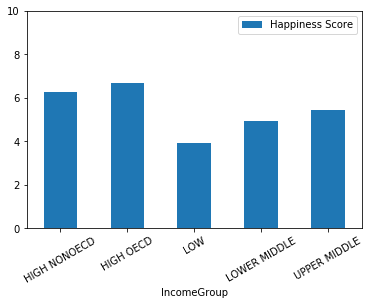

In [32]:
merged_new['IncomeGroup'] = merged_new['IncomeGroup'].str.replace(' income', '').str.replace(':', '').str.upper()
pv_incomes = merged_new.pivot_table(values='Happiness Score', index='IncomeGroup')
pv_incomes.plot(kind='bar', rot=30, ylim=(0,10))
plt.show()

,Happiness Score
IncomeGroup,
HIGH NONOECD,6.250765
HIGH OECD,6.674000
LOW,3.925625
LOWER MIDDLE,4.927971
UPPER MIDDLE,5.426718
